In [3]:
import pandas as pd

In [4]:
df_class = pd.read_csv("./КДФ/Classificator_hachaton.csv", sep=';')
df_accepted = pd.read_csv("./КДФ/MegaRelation_hackaton.csv", sep=';')
df_member = pd.read_csv("./КДФ/Pupil_hackaton.csv", sep=';')
df_org = pd.read_csv("./КДФ/org_hackaton.csv", sep=';')
df_request = pd.read_csv("./КДФ/request_hackaton.csv", sep=';')
df_services = pd.read_csv("./КДФ/services_hackaton.csv", sep=';')

In [5]:
id_name_dict = dict(zip(df_class.id_классификатора, df_class.Наименование))
parent_dict = dict(zip(df_class.id_классификатора, df_class.id_родительского_классификатора))

def find_parent(x):
    value = parent_dict.get(x, None)
    if value is None:
        return ""
    else:
        # Incase there is a id without name.
        if id_name_dict.get(value, None) is None:
            return "" + find_parent(value)

        return str(id_name_dict.get(value)) +";"+ find_parent(value)
    
def find_parent_category(x):
    res = find_parent(x)
    if len(res) == 0:
        return x
    res = res.split(';')
    if len(res) == 1:
        return res[0]
    if res[-1] == '':
        res = res[:-1]
    if len(res) == 1:
        return res[0]
    return res[-2]
    
df_class['Tag'] = df_class.id_классификатора.apply(lambda x: find_parent_category(x)).str.rstrip(';')

In [6]:
df_master = pd.merge(df_member, df_accepted, on='id_ученика', suffixes=('', '_y'))
df_master.drop(df_master.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_master = pd.merge(df_master, df_services, on='id_услуги', suffixes=('', '_y'))
df_master.drop(df_master.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_master = pd.merge(df_master, df_org, on='id_организации', suffixes=('', '_y'))
df_master.drop(df_master.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_master = pd.merge(df_master, df_org, on='id_организации', suffixes=('', '_y'))
df_master.drop(df_master.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
# df_master = pd.merge(df_master, df_request, on='id_услуги', suffixes=('', '_y'))
# df_master.drop(df_master.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)
df_master = pd.merge(df_master, df_class, left_on='Классификатор_услуги', right_on='id_классификатора', suffixes=('', '_y'))
df_master.drop(df_master.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

In [7]:
df_master.rename(columns={'Tag':"Наименование_родителя"}, inplace=True)
df_master['Наименование_родителя'] = df_master['Наименование_родителя'].fillna(df_master['Наименование'])

In [8]:
df_master.head()

,id_ученика,возраст,пол,id_зачисления,Статус,Дата_создания_записи,id_организации,id_заявления,id_услуги,дата_зачисления,...,длительность_обучения,единица_длительности,полное_наименование,краткое_наименование,улица,Метро,id_классификатора,id_родительского_классификатора,Наименование,Наименование_родителя
0,1,12.0,Женский,3804930,3.0,09.06.2016 12:01:08,46,1909576.0,144929,09.06.2016 12:01:08,...,"8,0000",лет,Государственное бюджетное учреждение дополните...,"ГБУДО г.Москвы ""ДМХШ ""Весна"" им. А.С.Пономарева""",проезд Дежнёва,Бабушкинская,3220102,3220100.0,Хоровое пение,Академическое вокально-хоровое искусство
1,1,12.0,Женский,3805008,1.0,09.06.2016 12:06:13,46,1909576.0,144929,09.06.2016 12:06:13,...,"8,0000",лет,Государственное бюджетное учреждение дополните...,"ГБУДО г.Москвы ""ДМХШ ""Весна"" им. А.С.Пономарева""",проезд Дежнёва,Бабушкинская,3220102,3220100.0,Хоровое пение,Академическое вокально-хоровое искусство
2,2,12.0,Женский,2924455,3.0,05.11.2015 13:34:01,46,3530167.0,144929,01.10.2015 0:00:00,...,"8,0000",лет,Государственное бюджетное учреждение дополните...,"ГБУДО г.Москвы ""ДМХШ ""Весна"" им. А.С.Пономарева""",проезд Дежнёва,Бабушкинская,3220102,3220100.0,Хоровое пение,Академическое вокально-хоровое искусство
3,2,12.0,Женский,3802338,3.0,08.06.2016 17:25:18,46,3530167.0,144929,08.06.2016 17:25:18,...,"8,0000",лет,Государственное бюджетное учреждение дополните...,"ГБУДО г.Москвы ""ДМХШ ""Весна"" им. А.С.Пономарева""",проезд Дежнёва,Бабушкинская,3220102,3220100.0,Хоровое пение,Академическое вокально-хоровое искусство
4,2,12.0,Женский,3804941,3.0,09.06.2016 12:01:49,46,3530167.0,144929,09.06.2016 12:01:49,...,"8,0000",лет,Государственное бюджетное учреждение дополните...,"ГБУДО г.Москвы ""ДМХШ ""Весна"" им. А.С.Пономарева""",проезд Дежнёва,Бабушкинская,3220102,3220100.0,Хоровое пение,Академическое вокально-хоровое искусство


In [9]:
df_master.columns

Index(['id_ученика', 'возраст', 'пол', 'id_зачисления', 'Статус',
       'Дата_создания_записи', 'id_организации', 'id_заявления', 'id_услуги',
       'дата_зачисления', 'дата_отчисления', 'причина_перевода',
       'предыдущая_запись_зачисления', 'следующая_запись_зачисления',
       'Плановая_дата_начала_занятий', 'Плановая_дата_окончания_занятий',
       'Тип_финансирования', 'Классификатор_услуги', 'Тип_расписания',
       'Наименование_услуги', 'Дата_создания', 'длительность_обучения',
       'единица_длительности', 'полное_наименование', 'краткое_наименование',
       'улица', 'Метро', 'id_классификатора',
       'id_родительского_классификатора', 'Наименование',
       'Наименование_родителя'],
      dtype='object')

In [11]:
df_master.Наименование_родителя

0          Академическое вокально-хоровое искусство
1          Академическое вокально-хоровое искусство
2          Академическое вокально-хоровое искусство
3          Академическое вокально-хоровое искусство
4          Академическое вокально-хоровое искусство
                             ...                   
1858827         Физкультурно-спортивное направление
1858828         Физкультурно-спортивное направление
1858829         Физкультурно-спортивное направление
1858830         Физкультурно-спортивное направление
1858831         Физкультурно-спортивное направление
Name: Наименование_родителя, Length: 1858832, dtype: object

In [7]:
list(df_master.columns)

['id_ученика',
 'возраст',
 'пол',
 'id_зачисления',
 'Статус',
 'Дата_создания_записи',
 'id_организации',
 'id_заявления',
 'id_услуги',
 'дата_зачисления',
 'дата_отчисления',
 'причина_перевода',
 'предыдущая_запись_зачисления',
 'следующая_запись_зачисления',
 'Плановая_дата_начала_занятий',
 'Плановая_дата_окончания_занятий',
 'Тип_финансирования',
 'Классификатор_услуги',
 'Тип_расписания',
 'Наименование_услуги',
 'Дата_создания',
 'длительность_обучения',
 'единица_длительности',
 'полное_наименование',
 'краткое_наименование',
 'улица',
 'Метро',
 'id_классификатора',
 'id_родительского_классификатора',
 'Наименование',
 'Наименование_родителя']

In [8]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

<AxesSubplot:>

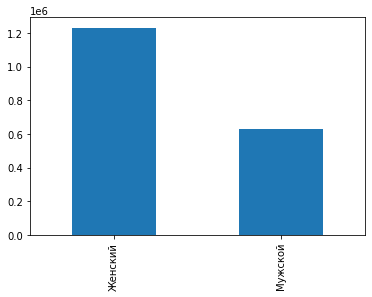

In [9]:
df_master.пол.value_counts().plot(kind='bar')

(array([8.63110e+05, 8.06709e+05, 4.45570e+04, 4.12020e+04, 2.86120e+04,
        4.63700e+04, 2.45300e+04, 3.09700e+03, 1.20000e+01, 5.80000e+01]),
 array([ -1. ,  11.1,  23.2,  35.3,  47.4,  59.5,  71.6,  83.7,  95.8,
        107.9, 120. ]),
 <BarContainer object of 10 artists>)

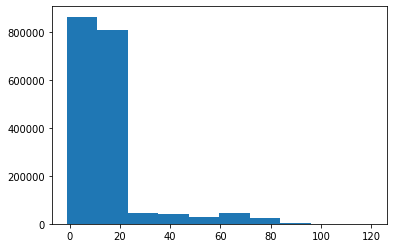

In [10]:
plt.hist(df_master.возраст)

<AxesSubplot:>

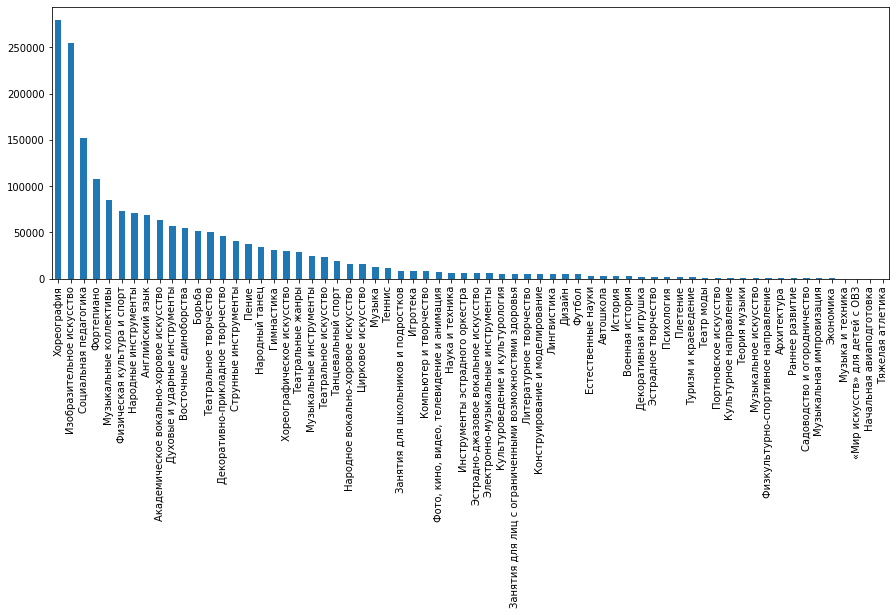

In [11]:
plt.figure(figsize=(15,5))
df_master.Наименование_родителя.value_counts().plot(kind='bar')

<AxesSubplot:>

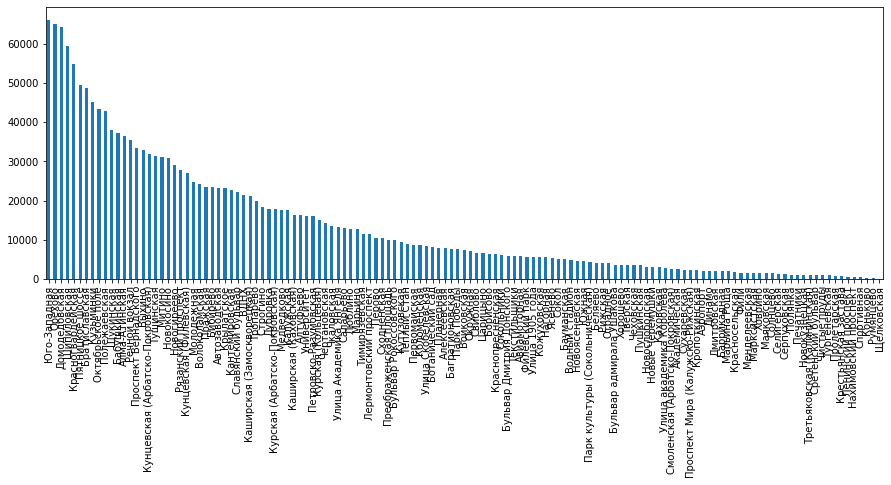

In [12]:
plt.figure(figsize=(15,5))
df_master.Метро.value_counts().plot(kind='bar')

<AxesSubplot:>

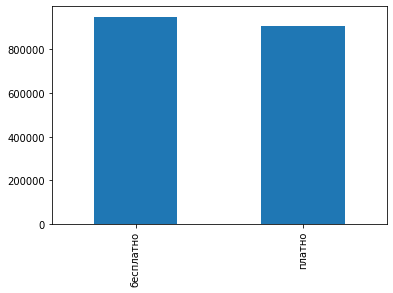

In [13]:
df_master.Тип_финансирования.value_counts().plot(kind='bar')

In [14]:
def age_cat(age):
    if age >= 0 and age < 7:
        return "дошкольники"
    if age >= 7 and age < 17:
        return "школьники"
    if age >= 17 and age < 22:
        return "студенты"
    if age >= 22 and age < 26:
        return "работающая молодёжь"
    if age >= 26 and age < 60:
        return "взрослые"
    if age >= 60:
        return "пенсионеры"
    return "другое"

In [15]:
plt.figure(figsize=(15,5))
df_master.возрастная_категория.value_counts().plot(kind='bar')

AttributeError: 'DataFrame' object has no attribute 'возрастная_категория'

<Figure size 1080x360 with 0 Axes>

In [16]:
df_master['возрастная_категория'] = df_master.возраст.apply(lambda x: age_cat(x))

In [17]:
df_master.Тип_финансирования

0          бесплатно
1          бесплатно
2          бесплатно
3          бесплатно
4          бесплатно
             ...    
1858827    бесплатно
1858828    бесплатно
1858829    бесплатно
1858830    бесплатно
1858831    бесплатно
Name: Тип_финансирования, Length: 1858832, dtype: object

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

columns = ['пол', "Тип_финансирования", "Наименование", "Наименование_родителя", "возрастная_категория", "Метро"]
# дополнительные фичи - частота посещения/кол-во кружков
# 
df_numeric = df_master[columns].copy()
df_numeric = df_numeric.fillna("н/д")
for c in columns:
    le.fit(df_numeric[c])
    df_numeric[c]=le.transform(df_numeric[c])
df_numeric.head()

,пол,Тип_финансирования,Наименование,Наименование_родителя,возрастная_категория,Метро
0,0,0,389,2,6,7
1,0,0,389,2,6,7
2,0,0,389,2,6,7
3,0,0,389,2,6,7
4,0,0,389,2,6,7


In [20]:
sns.pairplot(data=df_numeric, hue='Тип_финансирования')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x12a418f70> (for post_execute):


KeyboardInterrupt: 

In [ ]:
sns.pairplot(data=df_numeric, hue='возрастная_категория')

In [ ]:
sns.pairplot(data=df_numeric, hue='Метро')

In [ ]:
sns.pairplot(data=df_numeric, hue='Наименование_родителя')

In [ ]:
# df_selected = df_master[[
# 'возрастная_категория',
#  'пол',
#  'Тип_финансирования',
# #  'Классификатор_услуги',
#  'Тип_расписания',
# #  'Наименование_услуги',
# #  'Дата_создания',
# #  'полное_наименование',
# #  'краткое_наименование',
#  'Метро',
# #  'Наименование',
#  'Наименование_родителя']].fillna("другое")

# 


In [ ]:
corrMatrix = df_numeric.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
kmeans_1=KMeans(n_clusters=9)
kmeans_1.fit(X)
cluster_pred=kmeans_1.predict(X)
cluster_pred_2=kmeans_1.labels_
cluster_center=kmeans_1.cluster_centers_

In [ ]:
columns = ["Наименование_родителя", 'пол', "Тип_финансирования", "Наименование", "возрастная_категория",
           "Метро", 'Статус', 'Тип_расписания', 'улица', 'краткое_наименование']
# дополнительные фичи - частота посещения/кол-во кружков
# 
df_numeric = df_master[columns].copy()
df_numeric = df_numeric.fillna("н/д")
for c in columns:
    le.fit(df_numeric[c])
    df_numeric[c]=le.transform(df_numeric[c])
df_numeric.head()

In [ ]:
from sklearn.cluster import KMeans


X = df_numeric.values
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of cluster')
plt.ylabel('wcss: sum of dist. of sample to their closest cluster center' )

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
# Load in the data
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df_numeric)
# Create a PCA instance: pca
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [ ]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.005, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
ks = range(1, 20)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
kmeans_1=KMeans(n_clusters=10)
kmeans_1.fit(X)
cluster_pred=kmeans_1.predict(X)
cluster_pred_2=kmeans_1.labels_
cluster_center=kmeans_1.cluster_centers_

In [ ]:
df_numeric['cluster'] = cluster_pred_2

In [ ]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange',
          'pink', 'red', 'yellow',
          'green', 'purple', 'black',
         'orange', 'mustard', 'magenta', 'brown']

for color, i in zip(colors, range(10)):
    plt.scatter(df_numeric[df_numeric.cluster == i]["Наименование"], df_numeric[df_numeric.cluster == i]["возрастная_категория"], color=color, alpha=.8,
            )
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()

In [ ]:
for c in df_master.cluster.unique():
    print(c)
    print(df_master[df_master.cluster == c].Наименование.unique())

In [ ]:
df_master.groupby("Наименование").id_ученика.count().sort_values()

In [ ]:
df_master[df_master["Наименование"] == "Дошкольное развитие"].

In [25]:
len(df_master["id_услуги"].unique())

24125

In [26]:
df_master["Наименование"]

array(['Хоровое пение', 'Струнные инструменты',
       'Духовые и ударные инструменты', 'Балалайка', 'Кларнет',
       'Тенор, тромбон, туба', 'Аккордеон', 'Фортепиано', 'Скрипка',
       'Флейта / эстрад.-джаз.', 'Саксофон / эстрад.-джаз.',
       'Клавишный синтезатор', 'Домра', 'Академический вокал',
       'Блок-флейта', 'Гитара', 'Саксофон', 'Народные инструменты',
       'Баян', 'Виолончель', 'Труба', 'Фортепиано / эстрад.-джаз.',
       'Ударные инструменты / эстрад.-джаз.', 'Флейта',
       'Труба / эстрад.-джаз.', 'Ударные инструменты', 'Валторна',
       'Тромбон / эстрад.-джаз.', 'Альт', 'Кларнет / эстрад.-джаз.',
       'Музыкальный фольклор', 'Инструменты эстрадного оркестра',
       'Контрабас / эстрад.-джаз.', 'Электрогитара / эстрад.-джаз.',
       'Бас-гитара / эстрад.-джаз.', 'Гусли звончатые',
       'Эстрадно-джазовое пение', 'Фагот', 'Арфа', 'Гобой',
       'Эстрадный вокал', 'Орган', 'Музыкальное искусство', 'Гусли',
       'Контрабас', 'Изобразительная деятельнос

In [31]:
df_master.size

59482624

In [30]:
df_master.to_csv("кружки.csv")

In [28]:
!pip3 install wget

In [29]:
import wget

udpipe_url = 'https://rusvectores.org/static/models/udpipe_syntagrus.model'
text_url = 'https://rusvectores.org/static/henry_sobolya.txt'

modelfile = wget.download(udpipe_url)
textfile = wget.download(text_url)

ModuleNotFoundError: No module named 'wget'

In [50]:
df_embed = pd.read_pickle("group_word_embed.pkl")

In [51]:
df_embed.size

8679690

In [37]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
def tsne_plot(vec):
    "Creates and TSNE model and plots it"
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    array = np.array(vec, dtype=float)

    new_values = tsne_model.fit_transform(vec)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
#         plt.annotate(labels[i],
#                      xy=(x[i], y[i]),
#                      xytext=(5, 2),
#                      textcoords='offset points',
#                      ha='right',
#                      va='bottom')
    plt.show()

In [91]:
x = df_embed.final_embed.dropna().values
np.concatenate(x, axis=0)

KeyboardInterrupt: 

In [64]:
tsne_plot(df_embed.final_embed.values)

ValueError: setting an array element with a sequence.

In [ ]:
d